In [2]:
import numpy as np
import matplotlib.pyplot as plt

from experiments import Experiments

# Experiments
### Fixed $c$, increasing dimensions

In the following section I will test the algorithm's accuracy on matrices where the matching dimensions are increased, and everything else stays constant.
$$ $$
Random matrices with entries in $\[0,1\]$, sparse (density = 0.01) and dense
$ \delta = 0.05 \quad c = 50 \quad$ For dimensions 50 -> 1000 with increment of 50.

In [4]:
# Gather results
dimensions = [] + list(range(50, 1001, 50))
fix_dim = 100

a_dims = np.column_stack((np.full(len(dimensions), fill_value=fix_dim), dimensions))
b_dims = np.column_stack((dimensions, np.full(len(dimensions), fill_value=fix_dim)))

print("Calculating with options: dense, opt")
errors1, bounds1 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "dense",
                                                  prob_dist_type = "opt",
                                                  delta = 0.05)

print("Calculating with options: sparse, opt")
errors2, bounds2 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "sparse",
                                                  prob_dist_type = "opt",
                                                  delta = 0.05)

print("Calculating with options: dense, uniform")
errors3, bounds3 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "dense",
                                                  prob_dist_type = "uniform",
                                                  delta = 0.05)

print("Calculating with options: sparse, uniform")
errors4, bounds4 = Experiments.changing_dim_const_c(a_dims=a_dims,
                                                  b_dims=b_dims,
                                                  c = 50,
                                                  matrix_type = "sparse",
                                                  prob_dist_type = "uniform",
                                                  delta = 0.05)

Calculating with options: dense, opt
Calculating for A: (100 x 50)   B: (50 x 100)
Calculating for A: (100 x 100)   B: (100 x 100)
Calculating for A: (100 x 150)   B: (150 x 100)
Calculating for A: (100 x 200)   B: (200 x 100)
Calculating for A: (100 x 250)   B: (250 x 100)
Calculating for A: (100 x 300)   B: (300 x 100)
Calculating for A: (100 x 350)   B: (350 x 100)
Calculating for A: (100 x 400)   B: (400 x 100)
Calculating for A: (100 x 450)   B: (450 x 100)
Calculating for A: (100 x 500)   B: (500 x 100)
Calculating for A: (100 x 550)   B: (550 x 100)
Calculating for A: (100 x 600)   B: (600 x 100)
Calculating for A: (100 x 650)   B: (650 x 100)
Calculating for A: (100 x 700)   B: (700 x 100)
Calculating for A: (100 x 750)   B: (750 x 100)
Calculating for A: (100 x 800)   B: (800 x 100)
Calculating for A: (100 x 850)   B: (850 x 100)
Calculating for A: (100 x 900)   B: (900 x 100)
Calculating for A: (100 x 950)   B: (950 x 100)
Calculating for A: (100 x 1000)   B: (1000 x 100)
Cal

### Fix 100x100 dimension, but c is increased

In [9]:
# Gather results
c_vals = np.array([] + list(range(5, 101, 5)))
shape_a = (100, 100)
shape_b = (100, 100)

print("Calculating with options: dense, opt")
errors1, bounds1 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="dense",
                                                    prob_dist_type="opt",
                                                    delta=0.01)

print("Calculating with options: sparse, opt")
errors2, bounds2 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="sparse",
                                                    prob_dist_type="opt",
                                                    delta=0.01)

print("Calculating with options: dense, uniform")
errors3, bounds3 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="dense",
                                                    prob_dist_type="uniform",
                                                    delta=0.01)

print("Calculating with options: sparse, uniform")
errors4, bounds4 = Experiments.const_dim_changing_c(shape_a=shape_a, 
                                                    shape_b=shape_b,
                                                    list_c=c_vals,
                                                    matrix_type="sparse",
                                                    prob_dist_type="uniform",
                                                    delta=0.01)

Calculating with options: dense, opt
Calculating for c = 5...
Calculating for c = 10...
Calculating for c = 15...
Calculating for c = 20...
Calculating for c = 25...
Calculating for c = 30...
Calculating for c = 35...
Calculating for c = 40...
Calculating for c = 45...
Calculating for c = 50...
Calculating for c = 55...
Calculating for c = 60...
Calculating for c = 65...
Calculating for c = 70...
Calculating for c = 75...
Calculating for c = 80...
Calculating for c = 85...
Calculating for c = 90...
Calculating for c = 95...
Calculating for c = 100...
Calculating with options: sparse, opt
Calculating for c = 5...
Calculating for c = 10...
Calculating for c = 15...
Calculating for c = 20...
Calculating for c = 25...
Calculating for c = 30...
Calculating for c = 35...
Calculating for c = 40...
Calculating for c = 45...
Calculating for c = 50...
Calculating for c = 55...
Calculating for c = 60...
Calculating for c = 65...
Calculating for c = 70...
Calculating for c = 75...
Calculating for 

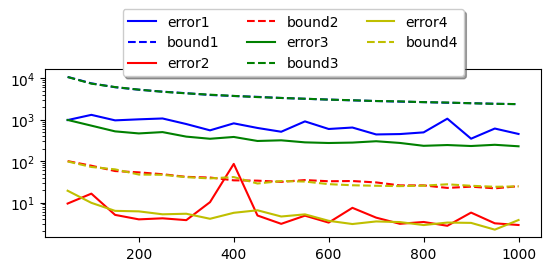

In [11]:
# Plot results

fig = plt.figure()
yerr = np.linspace(1, 1, 100_000)
ax = fig.add_subplot(2, 1, 1)
ax.set_yscale('log')

plt.errorbar(dimensions, errors1, label='error1', color='b')
plt.errorbar(dimensions, bounds1, label='bound1', uplims=True, fmt='--', color='b')

plt.errorbar(dimensions, errors2, label='error2', color='r')
plt.errorbar(dimensions, bounds2, uplims=True, label='bound2', fmt="--", color='r')

plt.errorbar(dimensions, errors3, label='error3', color='g')
plt.errorbar(dimensions, bounds3, uplims=True, label='bound3', fmt="--", color='g')

plt.errorbar(dimensions, errors4, label='error4', color='y')
plt.errorbar(dimensions, bounds4, uplims=True, label='bound4', fmt="--", color='y')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)